In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [88]:

df = pd.ExcelFile('response_model_data.xlsx')
df = df.parse('logistic data')

In [89]:
df.head()


,member_id,multiple_touchpoint,sales,quantity,n_products_purchased,n_cart_additions,n_product_views,n_browse_products,member_category_code,discount_pct,response
0,281499160,1,201.94,6,3,0,0,0,C,0.000000,1
1,2943363776,0,144.94,6,5,5,0,4,B,0.538462,1
2,2626959247,0,0.00,0,0,0,0,0,B,0.550000,0
3,4650643895,0,0.00,0,0,0,0,0,B,0.000000,0
4,4037522580,0,106.27,3,3,3,2,4,B,0.285714,1


In [90]:
df.isnull().sum()

member_id                  0
multiple_touchpoint        0
sales                      0
quantity                   0
n_products_purchased       0
n_cart_additions           0
n_product_views            0
n_browse_products          0
member_category_code    1425
discount_pct               0
response                   0
dtype: int64

In [91]:
df.drop('member_id',axis=1,inplace = True)


In [92]:
df.head()

,multiple_touchpoint,sales,quantity,n_products_purchased,n_cart_additions,n_product_views,n_browse_products,member_category_code,discount_pct,response
0,1,201.94,6,3,0,0,0,C,0.000000,1
1,0,144.94,6,5,5,0,4,B,0.538462,1
2,0,0.00,0,0,0,0,0,B,0.550000,0
3,0,0.00,0,0,0,0,0,B,0.000000,0
4,0,106.27,3,3,3,2,4,B,0.285714,1


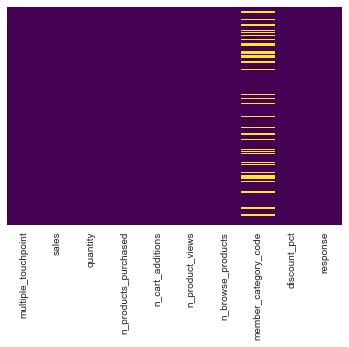

In [93]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

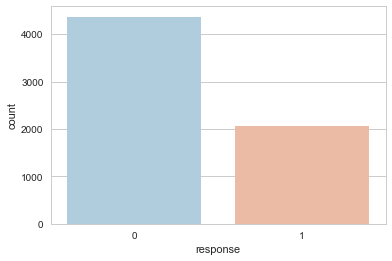

In [94]:
sns.set_style('whitegrid')
sns.countplot(x='response',data=df,palette='RdBu_r')

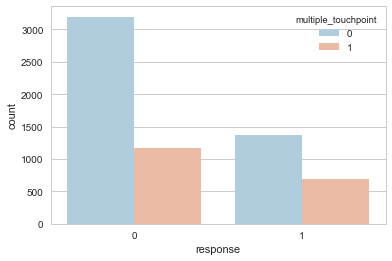

In [95]:
sns.set_style('whitegrid')
sns.countplot(x='response',hue='multiple_touchpoint',data=df,palette='RdBu_r')

In [96]:
def assign_category(cat):
    
    if pd.isnull(cat):
        return "NP"
    else:
        return cat

In [99]:
df['member_category_code'] = df['member_category_code'].apply(assign_category)

In [101]:
df.head()

,multiple_touchpoint,sales,quantity,n_products_purchased,n_cart_additions,n_product_views,n_browse_products,member_category_code,discount_pct,response
0,1,201.94,6,3,0,0,0,C,0.000000,1
1,0,144.94,6,5,5,0,4,B,0.538462,1
2,0,0.00,0,0,0,0,0,B,0.550000,0
3,0,0.00,0,0,0,0,0,B,0.000000,0
4,0,106.27,3,3,3,2,4,B,0.285714,1


In [102]:
cat = pd.get_dummies(df['member_category_code'],drop_first=True,prefix='Member_category')

In [105]:
df.drop('member_category_code',axis=1,inplace=True)

In [106]:
df = pd.concat([df,cat],axis=1)

In [107]:
df.head()

,multiple_touchpoint,sales,quantity,n_products_purchased,n_cart_additions,n_product_views,n_browse_products,discount_pct,response,Member_category_B,Member_category_C,Member_category_D,Member_category_E,Member_category_F,Member_category_NP,Member_category_X
0,1,201.94,6,3,0,0,0,0.000000,1,0,1,0,0,0,0,0
1,0,144.94,6,5,5,0,4,0.538462,1,1,0,0,0,0,0,0
2,0,0.00,0,0,0,0,0,0.550000,0,1,0,0,0,0,0,0
3,0,0.00,0,0,0,0,0,0.000000,0,1,0,0,0,0,0,0
4,0,106.27,3,3,3,2,4,0.285714,1,1,0,0,0,0,0,0


In [108]:
features = df.drop('response',axis=1)

In [109]:
features.head()

,multiple_touchpoint,sales,quantity,n_products_purchased,n_cart_additions,n_product_views,n_browse_products,discount_pct,Member_category_B,Member_category_C,Member_category_D,Member_category_E,Member_category_F,Member_category_NP,Member_category_X
0,1,201.94,6,3,0,0,0,0.000000,0,1,0,0,0,0,0
1,0,144.94,6,5,5,0,4,0.538462,1,0,0,0,0,0,0
2,0,0.00,0,0,0,0,0,0.550000,1,0,0,0,0,0,0
3,0,0.00,0,0,0,0,0,0.000000,1,0,0,0,0,0,0
4,0,106.27,3,3,3,2,4,0.285714,1,0,0,0,0,0,0


In [110]:
label = df['response']

In [111]:
label.head()

0    1
1    1
2    0
3    0
4    1
Name: response, dtype: int64

In [112]:
from sklearn.model_selection import train_test_split

In [113]:
X_train, X_test, y_train, y_test = train_test_split(features, 
                                                    label, test_size=0.20)

In [114]:
from sklearn.linear_model import LogisticRegression

In [115]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [116]:
predictions = logmodel.predict(X_test)

In [117]:
from sklearn.metrics import classification_report

In [118]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00       889
          1       1.00      1.00      1.00       398

avg / total       1.00      1.00      1.00      1287



In [119]:
from sklearn.metrics import confusion_matrix

In [120]:
confusion_matrix(y_test,predictions)

array([[889,   0],
       [  1, 397]])

In [121]:
from sklearn.metrics import accuracy_score

In [122]:
accuracy_score(y_test, predictions)

0.99922299922299918